# Importing Libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [53]:
df = pd.read_csv('final.csv')
df['Event_start_time'] = pd.to_datetime(df['Event_start_time'] , utc=True)
df

,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
0,0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,0,2020-09-05,...,0.291447,0.025000,44.299942,44.274942,1,0.025000,44.299942,0.025000,44.299942,2.087515e+05
1,1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,2020-07-18,...,0.470313,0.025000,52.550000,52.525000,2,0.025000,52.550000,52.575000,52.700000,1.586288e+05
2,2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,0,2020-09-03,...,0.429688,1.374937,45.274949,43.900012,1,1.374937,45.274949,1.374937,45.274949,2.463771e+05
3,3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,2020-09-01,...,0.168675,0.025000,10.849935,10.824935,1,0.025000,10.849935,0.025000,10.849935,1.770790e+06
4,4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,2020-08-08,...,0.596481,0.025000,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1.221349e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,0,2021-08-24,...,0.822213,0.025000,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,1.028918e+05
13071,13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,0,2021-04-26,...,0.137613,53.392769,71.583398,18.190629,1,53.392769,71.583398,53.392769,71.583398,1.259322e+06
13072,13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,0,2021-04-27,...,0.565029,0.025000,77.893402,77.868402,1,0.025000,77.893402,0.025000,77.893402,8.579901e+04
13073,13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,0,2021-09-02,...,0.948808,0.025000,194.742593,194.717593,1,0.025000,194.742593,0.025000,194.742593,3.478798e+04


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Unnamed: 0              13075 non-null  int64              
 1   Device_ID               13075 non-null  object             
 2   Event_ID                13075 non-null  object             
 3   Event_start_time        13075 non-null  datetime64[ns, UTC]
 4   Name_of_cat             12931 non-null  object             
 5   Weight_of_cat           13075 non-null  float64            
 6   Activity                13072 non-null  object             
 7   Cat_In_Box              13075 non-null  int64              
 8   Synapse_Labeled         13075 non-null  int64              
 9   Event_Date              13075 non-null  object             
 10  Event_start_time_hour   13075 non-null  int64              
 11  Given_Tare_Weight       12062 non-null  f

# Filters

In [55]:
df = df[df['Activity'].notnull()].reset_index()
df = df[(df['Device_ID']!='VB00000000000171') & (df['Name_of_cat']!='Azure')].reset_index()
#df = df[df['Name_of_cat'].notnull()]
#df = df[df['Cat_In_Box'] == 1].reset_index()
df['Elimination'] = df['Activity'].apply(lambda x: 0 if(x=='non_elimination') else 1)
df['Urination'] = df['Activity'].apply(lambda x: 1 if(x=='urination') else 0)
df

,level_0,index,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,...,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance,Elimination,Urination
0,0,0,0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,...,44.299942,44.274942,1,0.025000,44.299942,0.025000,44.299942,2.087515e+05,1,1
1,1,1,1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,...,52.550000,52.525000,2,0.025000,52.550000,52.575000,52.700000,1.586288e+05,1,1
2,2,2,2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,...,45.274949,43.900012,1,1.374937,45.274949,1.374937,45.274949,2.463771e+05,1,1
3,3,3,3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,...,10.849935,10.824935,1,0.025000,10.849935,0.025000,10.849935,1.770790e+06,0,0
4,4,4,4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,...,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1.221349e+05,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12513,13067,13070,13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,...,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,1.028918e+05,1,1
12514,13068,13071,13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,...,71.583398,18.190629,1,53.392769,71.583398,53.392769,71.583398,1.259322e+06,0,0
12515,13069,13072,13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,...,77.893402,77.868402,1,0.025000,77.893402,0.025000,77.893402,8.579901e+04,1,1
12516,13070,13073,13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,...,194.742593,194.717593,1,0.025000,194.742593,0.025000,194.742593,3.478798e+04,1,0


## Correlation Heat Map

<AxesSubplot:>

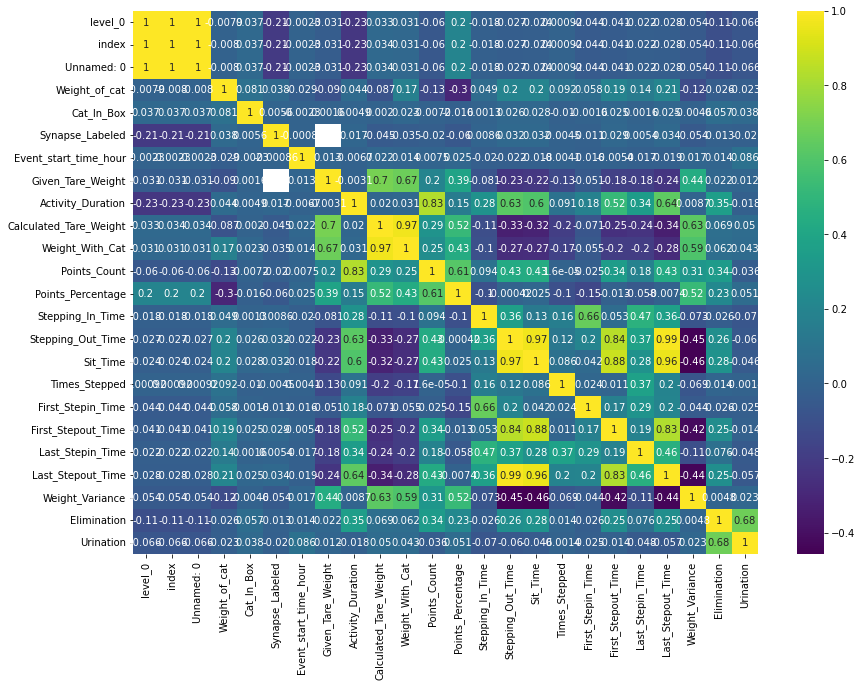

In [56]:
plt.figure(figsize=(14,10))
cor = df.corr()
sns.heatmap(cor, cmap = 'viridis',annot=True)

# First Model - To classify Elimination and Non-Elimination

## Featues Selection for X and y

In [57]:
X1 = df[['Sit_Time', 'Points_Count', 'Points_Percentage', 'Weight_Variance', 'Weight_of_cat', 'Stepping_In_Time', 'Times_Stepped', 'Event_start_time_hour']]
y1 = df['Elimination']

## Encoding Categorical Variable

In [58]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

'''ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Name_of_cat']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Name_of_cat'])'''

'''ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Device_ID']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Device_ID'])'''

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Event_start_time_hour']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Event_start_time_hour'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Spliting Train and Test set in ratio of 80%, 20% respectively

In [59]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)

In [60]:
X1_train

,Sit_Time,Points_Count,Points_Percentage,Weight_Variance,Weight_of_cat,Stepping_In_Time,Times_Stepped,0,1,2,...,14,15,16,17,18,19,20,21,22,23
9090,59.374953,2376,0.495000,7.318870e+04,3025.0,0.025000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4428,38.849932,1555,0.391885,8.728128e+04,4479.0,0.025000,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2145,0.000000,3520,1.000000,3.557657e+06,4243.0,0.000000,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10745,42.616376,1715,0.799907,2.807068e+05,4429.0,0.820496,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1239,22.299948,915,0.269752,2.135172e+05,5192.0,0.025000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,0.000000,2944,1.000000,2.059129e+06,3858.0,0.000000,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11633,75.039226,2997,0.554179,3.927227e+04,6481.0,0.025000,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,85.299950,3413,0.586023,3.657306e+04,5039.0,0.025000,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7293,0.000000,7424,1.000000,2.695582e+06,3426.0,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
ones = y1_train.value_counts()[1]/len(y1_train)
zeros = 1-ones

# Storing percentage of 1 in ones and percentage of 0 in zeros

In [62]:
'''from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=10)
clf1.fit(X1_train, y1_train)'''

'from sklearn.linear_model import LogisticRegression\nclf1 = LogisticRegression(random_state=10)\nclf1.fit(X1_train, y1_train)'

In [63]:
'''from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=10)
clf1.fit(X1_train, y1_train)'''

'from sklearn.tree import DecisionTreeClassifier\nclf1 = DecisionTreeClassifier(random_state=10)\nclf1.fit(X1_train, y1_train)'

In [64]:
'''import xgboost as xgb
clf1 = xgb.XGBClassifier(objective="binary:logistic", random_state=10)
clf1.fit(X1_train, y1_train)'''

'import xgboost as xgb\nclf1 = xgb.XGBClassifier(objective="binary:logistic", random_state=10)\nclf1.fit(X1_train, y1_train)'

### Tried various Algorithms and Random Forest Classifier seems best for our model

## Training Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 20, class_weight = {0: zeros, 1: ones},  random_state=10)
clf1.fit(X1_train, y1_train)

RandomForestClassifier(class_weight={0: 0.29438785700019976,
                                     1: 0.7056121429998002},
                       max_depth=20, random_state=10)

## K Fold cross validation 

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=1)

scores = cross_val_score(clf1, X1, y1, cv=cv ,scoring='accuracy', n_jobs=-1)
print('Accuracy mean: '+str(scores.mean()))
print('Accuracy std: '+str(scores.std()))

scores

# Cross validated model for 10 different samples of test and train, and mean accuracy is 84.22% with standard deviation of 01.03%

Accuracy mean: 0.8506978442804861
Accuracy std: 0.015848515078463354


array([0.86741214, 0.85223642, 0.84984026, 0.81629393, 0.83146965,
       0.84744409, 0.85463259, 0.85063898, 0.87130296, 0.86570743])

## Feature Importance in Model

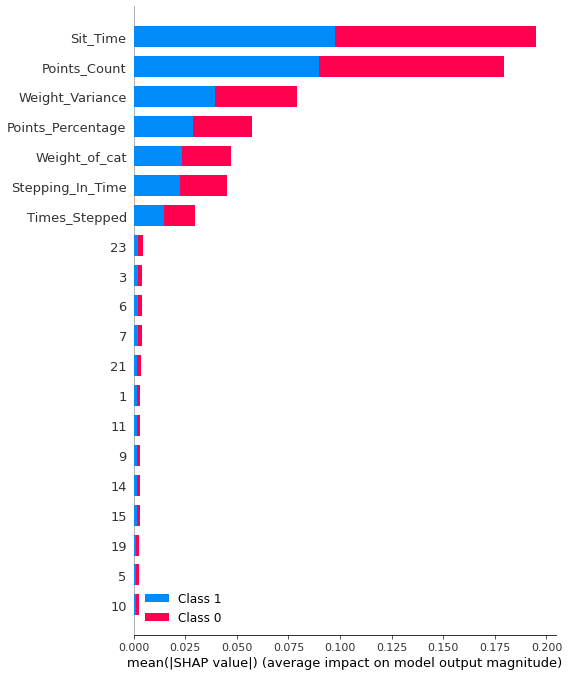

In [67]:
import shap
explainer = shap.TreeExplainer(clf1)
choosen_instance = X1_test
shap_values = explainer.shap_values(choosen_instance, check_additivity=False)
shap.summary_plot(shap_values, X1_test)

# Points_Count is the most important feature in model

## Features impact of model Output

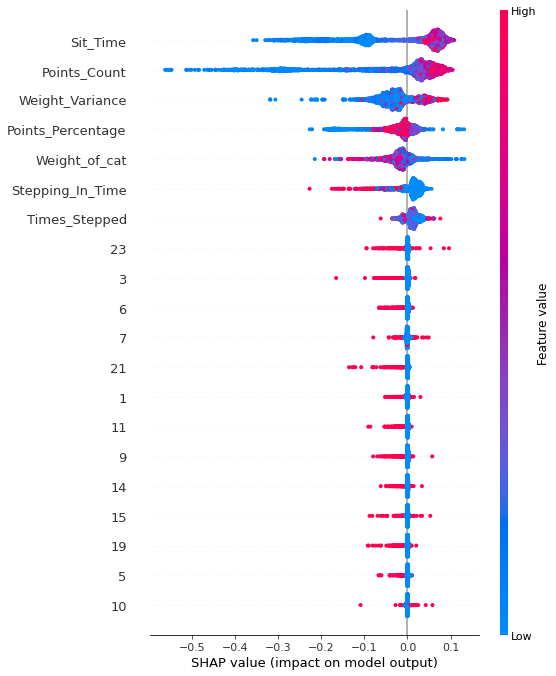

In [68]:
import shap 
explainer = shap.TreeExplainer(clf1) 
shap_values = explainer.shap_values(X1_test)
shap.summary_plot(shap_values[1], X1_test)

# With increase in Weight_of_cat and Stepping_In_Time probablty of predicting 0 is increasing

## ROC Curve

0.8461384255865102


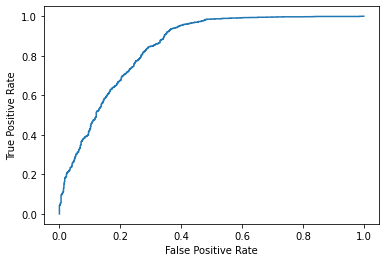

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf1.predict_proba(X1_test)[::,1]
fpr, tpr, _ = roc_curve(y1_test, y_pred_proba)

auc = roc_auc_score(y1_test, clf1.predict_proba(X1_test)[::,1])
print(auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Precision-Recall Curve for predicting 0

Precision Recall Curve for "0"


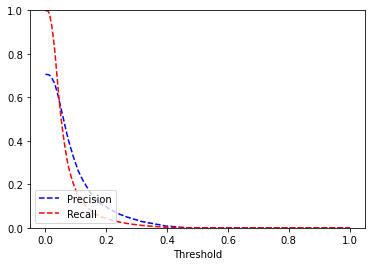

In [70]:
from sklearn.metrics import precision_recall_curve
predicted_proba = clf1.predict_proba(X1_train)
precision, recall, threshold = precision_recall_curve(y1_train, predicted_proba[:, 0])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])
print('Precision Recall Curve for "0"')

## Precision-Recall Curve for predicting 1

Precision Recall Curve for "1"


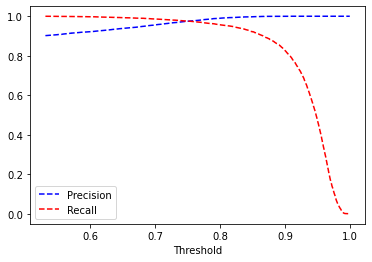

In [71]:
from sklearn.metrics import precision_recall_curve

predicted_proba = clf1.predict_proba(X1_train)
precision, recall, threshold = precision_recall_curve(y1_train, predicted_proba[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
print('Precision Recall Curve for "1"')

# Point of Intersection of Precision and Recall lines will be used as threshold to classify and 0 and 1 from predicted probablies

### Checking model accuracy on Train set for threshold obtained from Precision Recall Curve for "1"

In [72]:
from sklearn.metrics import accuracy_score

#threshold = 0.75 taken from Precision Recall Curve for "1"

threshold = 0.75

predicted_proba = clf1.predict_proba(X1_train)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y1_train, predicted)
accuracy*100

96.47493509087278

### Using threshold obtained to classify 0 and 1 for test set and train set

In [73]:
threshold = 0.75

predicted_proba = clf1.predict_proba(X1_test)
test1_pred = (predicted_proba [:,1] >= threshold).astype('int')

predicted_proba = clf1.predict_proba(X1_train)
train1_pred = (predicted_proba [:,1] >= threshold).astype('int')

#test1_pred = clf1.predict(X1_test)
#train1_pred = clf1.predict(X1_train)

## Model report, Confusion Matrix and Accuracy on Test set

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y1_test, test1_pred))

tn, fp, fn, tp = confusion_matrix(y1_test, test1_pred).ravel()
confusion_matrix(y1_test, test1_pred)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       744
           1       0.86      0.88      0.87      1760

    accuracy                           0.82      2504
   macro avg       0.78      0.77      0.78      2504
weighted avg       0.81      0.82      0.82      2504



array([[ 496,  248],
       [ 210, 1550]], dtype=int64)

In [75]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

81.70926517571885

## Model report, Confusion Matrix and Accuracy on Train set

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y1_train, train1_pred))
tn, fp, fn, tp = confusion_matrix(y1_train, train1_pred).ravel()
confusion_matrix(y1_train, train1_pred)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2948
           1       0.97      0.98      0.98      7066

    accuracy                           0.96     10014
   macro avg       0.96      0.96      0.96     10014
weighted avg       0.96      0.96      0.96     10014



array([[2771,  177],
       [ 176, 6890]], dtype=int64)

In [77]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

96.47493509087278

## Misclassification Analysis

In [78]:
threshold = 0.75

predicted_proba = clf1.predict_proba(X1)
df['Elimination_Prob'] = predicted_proba [:,1]
X_pred = (predicted_proba [:,1] >= threshold).astype('int')
df['Elimination_Pred'] = X_pred

#### Misclassification of 0

In [79]:
temp = df[(df['Elimination'] != df['Elimination_Pred']) & (df['Elimination_Pred'] == 0)]
temp['Elimination_Prob'].describe()

# Model Predicted it 0, while it is 1 in dateset
# Couldnt find any pattern in Missclafication of 0 for a new feature to be created

count    386.000000
mean       0.616740
std        0.153496
min        0.000000
25%        0.584754
50%        0.670000
75%        0.717303
max        0.749885
Name: Elimination_Prob, dtype: float64

#### Misclassification of 1

In [80]:
temp = df[(df['Elimination'] != df['Elimination_Pred']) & (df['Elimination_Pred'] == 1)]
temp['Elimination_Prob'].describe()

# Model Predicted it 1, while it is 0 in dateset
# Couldnt find any pattern in Missclafication of 0 for a new feature to be created

count    425.000000
mean       0.845632
std        0.064429
min        0.750935
25%        0.786453
50%        0.836356
75%        0.900904
max        0.975834
Name: Elimination_Prob, dtype: float64

# SECOND MODEL - To classify Elimination and Non-Elimination

## Predicing Elimination from first model

In [81]:
threshold = 0.75

predicted_proba = clf1.predict_proba(X1)
X_pred = (predicted_proba [:,1] >= threshold).astype('int')

In [82]:
df['Elimination_Pred'] = X_pred
df2 = df[df['Elimination_Pred']==1]

# We will predict Urination and Defecation from Elimination predicted from first model 

## Features Selection for X and y

In [83]:
X2 = df2[['Sit_Time', 'Points_Count', 'Points_Percentage', 'Weight_Variance', 'Weight_of_cat', 'Stepping_In_Time', 'Times_Stepped', 'Event_start_time_hour']]
y2 = df2['Urination']

## Encoding Categorical Variable

In [84]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

'''ohe = OneHotEncoder()
transformed = ohe.fit_transform(X2[['Name_of_cat']])

X2[ohe.categories_[0]] = transformed.toarray()
X2 = X2.drop(columns = ['Name_of_cat'])'''

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X2[['Event_start_time_hour']])

X2[ohe.categories_[0]] = transformed.toarray()
X2 = X2.drop(columns = ['Event_start_time_hour'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Spliting Train and Test set in ratio of 80%, 20% respectively

In [85]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=20)

In [86]:
ones = y2_train.value_counts()[1]/len(y2_train)
zeros = 1-ones

# Storing percentage of 1 in ones and percentage of 0 in zeros## Training Model

## Training Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators = 100, max_depth = 15, class_weight = {0: zeros, 1: ones}, random_state=20)
clf2.fit(X2_train, y2_train)

RandomForestClassifier(class_weight={0: 0.29906937394247035,
                                     1: 0.7009306260575296},
                       max_depth=15, random_state=20)

## K Fold cross validation 

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=2)

scores = cross_val_score(clf2, X2, y2, cv=cv ,scoring='accuracy', n_jobs=-1)
print('Accuracy mean: '+str(scores.mean()))
print('Accuracy std: '+str(scores.std()))

scores

Accuracy mean: 0.7796955522584816
Accuracy std: 0.01668852703924707


array([0.78241263, 0.78128523, 0.79819617, 0.77452086, 0.76099211,
       0.75395034, 0.80699774, 0.79458239, 0.78442438, 0.75959368])

## Feature Importance in Model

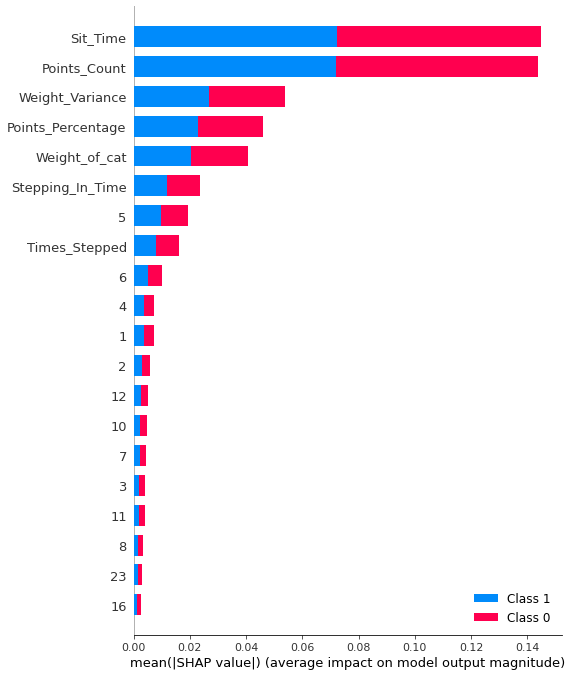

In [89]:
import shap
explainer = shap.TreeExplainer(clf2)
choosen_instance = X2_test
shap_values = explainer.shap_values(choosen_instance, check_additivity=False)
shap.summary_plot(shap_values, X2_test)

## Features impact of model Output

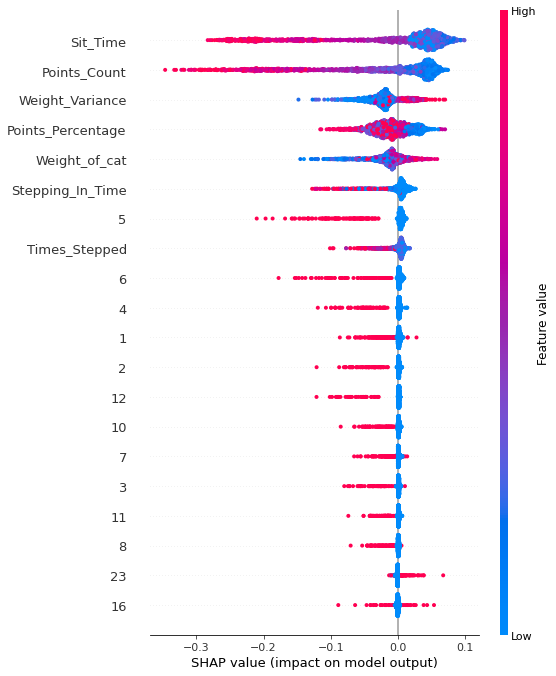

In [90]:
import shap 
explainer = shap.TreeExplainer(clf2) 
shap_values = explainer.shap_values(X2_test)
shap.summary_plot(shap_values[1], X2_test)

## ROC Curve

0.8428670578492425


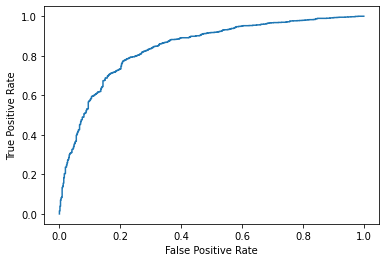

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf2.predict_proba(X2_test)[::,1]
fpr, tpr, _ = roc_curve(y2_test, y_pred_proba)

auc = roc_auc_score(y2_test, clf2.predict_proba(X2_test)[::,1])
print(auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Precision-Recall Curve for predicting 0

Precision Recall Curve for "0"


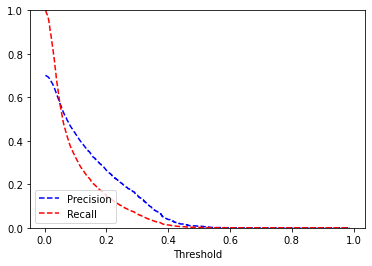

In [92]:
from sklearn.metrics import precision_recall_curve
predicted_proba = clf2.predict_proba(X2_train)
precision, recall, threshold = precision_recall_curve(y2_train, predicted_proba[:, 0])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])
print('Precision Recall Curve for "0"')

## Precision-Recall Curve for predicting 1

Precision Recall Curve for "1"


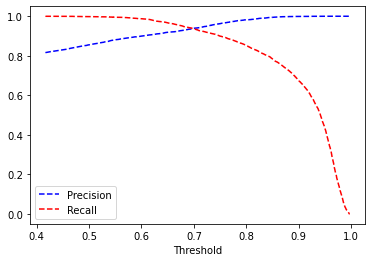

In [93]:
from sklearn.metrics import precision_recall_curve

predicted_proba = clf2.predict_proba(X2_train)
precision, recall, threshold = precision_recall_curve(y2_train, predicted_proba[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
print('Precision Recall Curve for "1"')

### Checking model accuracy on Train set for threshold obtained from Precision Recall Curve for "1"

In [94]:
from sklearn.metrics import accuracy_score

#threshold = 0.7 taken from Precision Recall Curve for "1"

threshold = 0.7

predicted_proba = clf2.predict_proba(X2_train)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y2_train, predicted)
accuracy*100

91.22955442752398

### Using threshold obtained to classify 0 and 1 for test set and train set

In [95]:
threshold = 0.7

predicted_proba = clf2.predict_proba(X2_test)
test2_pred = (predicted_proba [:,1] >= threshold).astype('int')

predicted_proba = clf2.predict_proba(X2_train)
train2_pred = (predicted_proba [:,1] >= threshold).astype('int')

#test2_pred = clf2.predict(X2_test)
#train2_pred = clf2.predict(X2_train)

## Model report, Confusion Matrix and Accuracy on Test set

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y2_test, test2_pred))
tn, fp, fn, tp = confusion_matrix(y2_test, test2_pred).ravel()
confusion_matrix(y2_test, test2_pred)

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       559
           1       0.86      0.84      0.85      1214

    accuracy                           0.79      1773
   macro avg       0.76      0.77      0.77      1773
weighted avg       0.80      0.79      0.80      1773



array([[ 393,  166],
       [ 199, 1015]], dtype=int64)

In [97]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

79.41342357586012

## Model report, Confusion Matrix and Accuracy on Train set

In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y2_train, train2_pred))
tn, fp, fn, tp = confusion_matrix(y2_train, train2_pred).ravel()
confusion_matrix(y2_train, train2_pred)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2121
           1       0.94      0.94      0.94      4971

    accuracy                           0.91      7092
   macro avg       0.89      0.90      0.90      7092
weighted avg       0.91      0.91      0.91      7092



array([[1819,  302],
       [ 320, 4651]], dtype=int64)

In [99]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

91.22955442752398

## Misclassification Analysis

In [100]:
threshold = 0.7

predicted_proba = clf2.predict_proba(X2)
df2['Urination_Prob'] = predicted_proba [:,1]
X_pred = (predicted_proba [:,1] >= threshold).astype('int')
df2['Urination_Pred'] = X_pred


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Misclassification of 0

In [101]:
temp = df2[(df2['Urination'] != df2['Urination_Pred']) & (df2['Urination_Pred'] == 0)]
temp['Urination_Prob'].describe()

# Model Predicted it 0, while it is 1 in dateset
# Couldnt find any pattern in Missclafication of 0 for a new feature to be created

count    519.000000
mean       0.592771
std        0.113695
min        0.107060
25%        0.563833
50%        0.627826
75%        0.670237
max        0.699902
Name: Urination_Prob, dtype: float64

#### Misclassification of 1

In [102]:
temp = df2[(df2['Urination'] != df2['Elimination_Pred']) & (df2['Urination_Pred'] == 1)]
temp['Urination_Prob'].describe()

# Model Predicted it 1, while it is 0 in dateset
# Couldnt find any pattern in Missclafication of 0 for a new feature to be created

count    468.000000
mean       0.792199
std        0.070308
min        0.700169
25%        0.734631
50%        0.772988
75%        0.834068
max        0.987791
Name: Urination_Prob, dtype: float64